In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
original_img = plt.imread('puneet-kumar-screaming-on-a-bike.jpg')

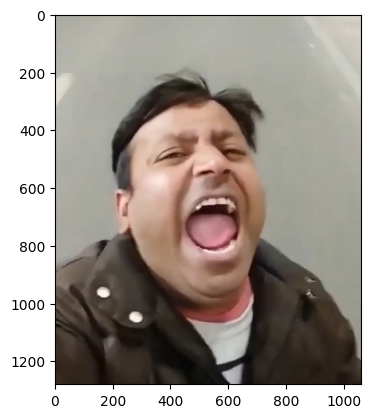

In [3]:
plt.imshow(original_img)

In [4]:
original_img.shape

(1280, 1060, 3)

In [5]:
original_img = original_img / 255

In [6]:
x_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [7]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points , axis = 0)
    
    ### END CODE HERE ## 
    
    return centroids

In [8]:

def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [9]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
            
            
        idx[i] = np.argmin(distance)
            
        
    ### END CODE HERE ###
    
    return idx

In [10]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

from sklearn.cluster import KMeans

k = 16
max_iters = 10
clusters = KMeans(n_cluster = 3 , random_state = 5 )

clusters.fit(x_img)

In [11]:

k = 16
max_iters = 5

initial_centroids = kMeans_init_centroids(x_img, k)
centroids , idx = run_kMeans(x_img , initial_centroids , max_iters)

K-Means iteration 0/4
K-Means iteration 1/4
K-Means iteration 2/4
K-Means iteration 3/4
K-Means iteration 4/4


KeyboardInterrupt: 

In [ ]:
print("shape of idx:" , idx.shape)
print("closest centroid of the first five elements:", idx[:5])
print(centroids)

shape of idx: (1356800,)
closest centroid of the first five elements: [8 8 8 8 8]
[[0.67528189 0.67599079 0.64817636]
 [0.71801343 0.7163781  0.68201258]
 [0.64864593 0.6475959  0.60500927]
 [0.1822228  0.14396464 0.11661546]
 [0.70440376 0.54185396 0.47684995]
 [0.57830888 0.44200742 0.38400428]
 [0.61232243 0.61190714 0.56990536]
 [0.43613719 0.32321796 0.27647391]
 [0.66534434 0.66319037 0.6244702 ]
 [0.67944155 0.68159111 0.63766347]
 [0.88356584 0.74169554 0.68264258]
 [0.80736467 0.64205297 0.58876007]
 [0.82641942 0.80387533 0.76776951]
 [0.69182085 0.69212973 0.65614459]
 [0.10537369 0.07599957 0.06221875]
 [0.27221565 0.22509011 0.19167477]]


In [ ]:
x_recovered = centroids[idx, :]

x_recovered = np.reshape(x_recovered, original_img.shape)

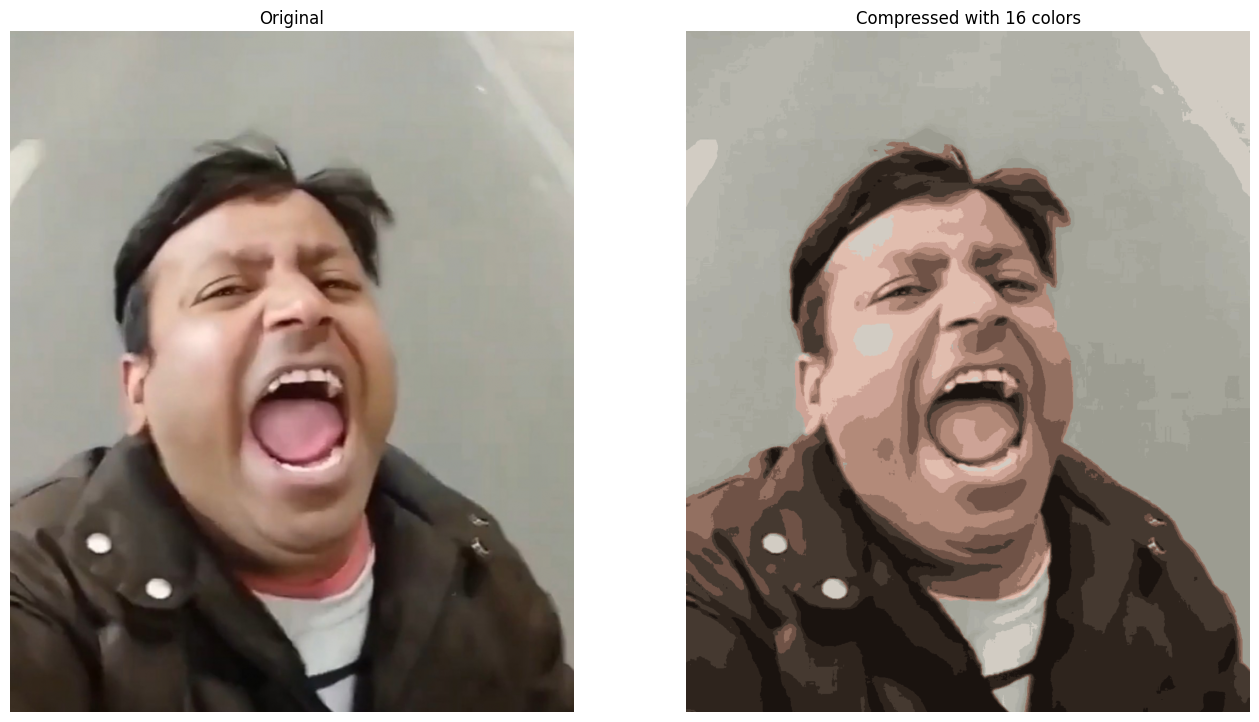

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16,16))
plt.axis('off')


ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


ax[1].imshow(x_recovered)
ax[1].set_title('Compressed with %d colors' %k)
ax[1].set_axis_off()